# The Grid!

In this notebook as a part of my (Shannon Gallagher's) final project for Computational Physics Spring 2020 (PHY325). 

As part of my project to transform a 2d cluster grid into a neural network to model percolation, this jupyter notebook focuses on the construction of the 2d grid. 

So to create this grid one must understand two components:
1. Computational: How to create and tune a 2d cluster grid
2. Physical: What is the physical basis of this percolation model



## Computational

I am basing my 2d grid model off of Giordano's Computational Physics as well as this example from the scipython website: https://scipython.com/blog/the-forest-fire-model/.


[1]Giordano N. 1997. "Computational Physics." Upper Sadie River, NJ: Pretence-Hall inc. p. 315-328


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors

In [7]:
# I will modify the code from the scipython.com forest fire model
#to represent my percolation model

%matplotlib notebook






EMPTY,ROCK,WATER = 0, 1, 2
# Colours for visualization: brown for ROCK, white for EMPTY and blue
# for WATER. Note that for the colormap to work, this list and the bounds list
# must be one larger than the number of different values in the array.

#I initially chose shades of brown for water accepting and water blocking soil, however those
#colors were less easily separated visually



source= 0 #1,2,3,4

#Source 0 is above
#Source 1 the left
#Source 2 is beneath
#Source 3 is the right
#Source 4 is the center



colors_list = ['gray', 'brown','blue']
cmap = colors.ListedColormap(colors_list)
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)

def iterate(X):
    """Iterate the ground according to the percolation rules."""


    
    # In this model we will only count the four nearest neighbors, above, below, left, and right
    # this assumes that water cannot move between the crack of two rock neighbors 
    neighborhood = ((-1,0), (0,-1), (0, 1), (1,0))
    X1 = np.zeros((ny, nx))
    
    # The boundary of the ground is always empty, so only consider cells
    # indexed from 1 to nx-2, 1 to ny-2
    
    for ix in range(1,nx-1):
        for iy in range(1,ny-1):
            
            #if the cell is rock or water or empty before it will stay the same
            if X[iy,ix] == WATER: 
                X1[iy,ix] = WATER
            if X[iy,ix] == ROCK: 
                X1[iy,ix] = ROCK
            if X[iy,ix] == EMPTY:
                X1[iy,ix] = EMPTY
                        #unless the cell is empty next to water
                        #in which case it will become a water cell
                for dx,dy in neighborhood:
                    if X[iy+dy,ix+dx] == WATER:
                        X1[iy,ix] = WATER
                        break
    return X1

# The initial fraction of the forest occupied by rocks.
rock_fraction = 0.45

# ground section size (number of cells in x and y directions).
nx, ny = 100, 100


# Initialize the ground section grid.
X  = np.zeros((ny, nx))

X[1:ny-1, 1:nx-1] = np.random.randint(0, 2, size=(ny-2, nx-2))

#initializes the rocks
X[1:ny-1, 1:nx-1] = np.random.random(size=(ny-2, nx-2)) < rock_fraction

if source == 0: #above
    X[0,0:nx-1] = 2
    
if source == 1: #left
    X[0:ny-1,0] = 2
    
if source == 2: #beneath
    X[0:ny-1,0] = 2
    
if source == 3: #right
    X[0:ny-1,ny-1] = 2
    
if source == 4: #center
    midy= ny//2
    midx= nx//2
    X[midy,midx] = 2

fig = plt.figure(figsize=(25/3, 6.25))
ax = fig.add_subplot(111)
ax.set_axis_off()
im = ax.imshow(X, cmap=cmap, )#norm=norm)#, interpolation='nearest')

# The animation function: called to produce a frame for each generation.
def animate(i):
    im.set_data(animate.X)
    animate.X = iterate(animate.X)
# Bind our grid to the identifier X in the animate function's namespace.
animate.X = X




# Interval between frames (ms).
interval = 100
anim = animation.FuncAnimation(fig, animate, interval=interval,frames=150,repeat=False,save_count=150)
anim.save('test.mp4')
plt.show()




<IPython.core.display.Javascript object>

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


ValueError: unknown file extension: .mp4

In [12]:
def percolate_sim(width,height,rock_fraction,data_return=False,source=0):
    """This function simulates the percolation of groundwater through porous soil. 
    This simulation assumes that there is a water source along the left boundary of the 
    lattice. This simulation does not take gravity into account, and assumes that the 
    water source is at sufficient pressure that if an available square is next to the water
    the water will fill it.
    
    Code is based off/inspired by:
    https://scipython.com/blog/the-forest-fire-model/
    
    
    parameters:
    (width,height): tuple of integers representing the width and height of the soil section 
    respectively
    rock_fraction: float <1 that represents the percentage of rock in the soil which cannot
    absorb water
    data_return: boolean which when true returns the initial conditions in an nx by 
    ny matrix, as well as the percentage of empty sections filled with water
    source: integer between 0 and 4, correspoding to different water source loactions
    which correspond respectively to above left, below, right, and center.
    
    
    
    returns(optional, see data_return flag)
    initial_matrix: width by height matrix of initial conditions(0 = empty, 1 = rock, 2 = water)
    percentage submerged: float between 0 and 1, rounded to the nearest .1 for analysis 
    purposes
    
    """
    %matplotlib notebook
    #so any animation will be generated in the notebook
    
    EMPTY,ROCK,WATER = 0, 1, 2
    # Colours for visualization: brown for ROCK, gray for EMPTY and blue
    # for WATER. 
    
    #sets up colormap
    colors_list = ['gray', 'brown','blue']
    cmap = colors.ListedColormap(colors_list)
    bounds = [0,1,2,3]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    
    nx =width
    ny= height
    
    # Initialize the ground section grid.
    X  = np.zeros((ny, nx))
    
    #initializes the rocks
    X[1:ny-1, 1:nx-1] = np.random.randint(0, 2, size=(ny-2, nx-2))
    X[1:ny-1, 1:nx-1] = np.random.random(size=(ny-2, nx-2)) < rock_fraction
    
    #Source 0 is above
    #Source 1 the left
    #Source 2 is beneath
    #Source 3 is the right
    #Source 4 is the center

    if source == 0: #above
        X[0,0:nx-1] = 2
    
    if source == 1: #left
        X[0:ny-1,0] = 2
    
    if source == 2: #beneath
        X[0:ny-1,0] = 2
    
    if source == 3: #right
        X[0:ny-1,ny-1] = 2
    
    if source == 4: #center
        midy= ny//2
        midx= nx//2
        X[midy,midx] = 2
    
    #creates the figure
    fig = plt.figure(figsize=(25/3, 6.25))
    ax = fig.add_subplot(111)
    ax.set_axis_off()
    im = ax.imshow(X, cmap=cmap, )#norm=norm)#, interpolation='nearest')
        
    animate.X=X
    #if x is referenced, it is x animated
    
    # Interval between frames (ms).
    interval = 100
    anim = animation.FuncAnimation(fig, animate, interval=interval)#,frames=200)
    plt.show()

<IPython.core.display.Javascript object>


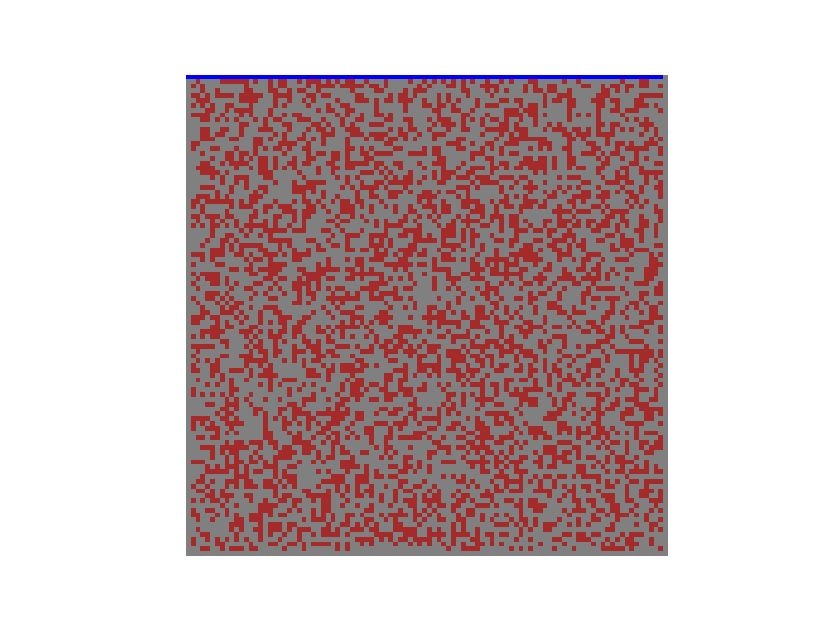

In [13]:
percolate_sim(100,100,.4,data_return=False,source=0)